# <center> **Titanic**

# **Libraries**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


import functions
import importlib

import warnings

importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Dell\\Documents\\AI\\Titanic\\Notebooks\\functions.py'>

# **Data Overview and Preprocessing**

In [25]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\Data\train.csv",
    index_col=False
)

test = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\Data\test.csv",
    index_col=False
)

random_state = 101
target = 'Transported'

# **Information Extraction**

## **PassengerId**

In [26]:
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

In [27]:
train['GroupSize']=train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['GroupSize']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

In [28]:
column = train.pop('Group')
train.insert(1, 'Group', column)

column = test.pop('Group')
test.insert(1, 'Group', column)

column = train.pop('GroupSize') 
train.insert(2, 'GroupSize', column)    

column = test.pop('GroupSize')  
test.insert(2, 'GroupSize', column)

## **Cabin**

In [29]:
train[['CabinDeck', 'CabinNumber', 'CabinSide']] = train['Cabin'].str.split('/', expand=True)
test[['CabinDeck', 'CabinNumber', 'CabinSide']] = test['Cabin'].str.split('/', expand=True)

In [30]:
column = train.pop('CabinDeck')
train.insert(5, 'CabinDeck', column)
column = test.pop('CabinDeck')
test.insert(5, 'CabinDeck', column)

column = train.pop('CabinNumber') 
train.insert(6, 'CabinNumber', column)  
column = test.pop('CabinNumber') 
test.insert(6, 'CabinNumber', column)    

column = test.pop('CabinSide')  
test.insert(7, 'CabinSide', column)
column = train.pop('CabinSide') 
train.insert(7, 'CabinSide', column)    

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

### **Train Set Missing Values**

In [31]:
missing_values = functions.MissingValues(train)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,201,2.31
CryoSleep,217,2.50
CabinDeck,199,2.29
CabinNumber,199,2.29
CabinSide,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11


### **Test Set Missing Values**

In [32]:
missing_values = functions.MissingValues(test)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,87,2.03
CryoSleep,93,2.17
CabinDeck,100,2.34
CabinNumber,100,2.34
CabinSide,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48


## **Cabin Side Missing Values**

Everyone in the same group is also on the same cabin side. For cabin deck and cabin number there is also a fairly good (but not perfect) correlation with group

In [33]:
unique_cabinside_per_group = train[train['GroupSize']>1].groupby('Group')['CabinSide'].nunique()
grouped_by_unique_count = unique_cabinside_per_group.value_counts().sort_index()

grouped_by_unique_count = grouped_by_unique_count.to_frame().reset_index()

In [34]:
unique_cabinside_per_group = test[test['GroupSize']>1].groupby('Group')['CabinSide'].nunique()
grouped_by_unique_count = unique_cabinside_per_group.value_counts().sort_index()

grouped_by_unique_count = grouped_by_unique_count.to_frame().reset_index()

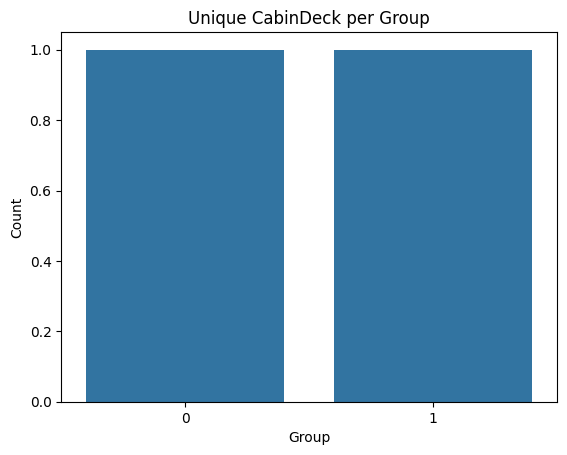

In [35]:
sns.countplot(data=grouped_by_unique_count, x='CabinSide')
plt.title('Unique CabinDeck per Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

## **Cabin Side Imputation by Group Number**

In [36]:
# Step 1: Group by 'Group' and 'CabinSide' for groups with more than 1 member, and count occurrences
group_cabinside = train[train['GroupSize'] > 1].groupby(['Group', 'CabinSide']).size().unstack(fill_value=0)

# Step 2: Identify rows where 'CabinSide' is missing and 'Group' is in the group_cabinside index.
missing_cabinside_mask = train['CabinSide'].isna() & train['Group'].isin(group_cabinside.index)

# Step 3: Fill missing 'LastName' based on the most common 'LastName' in each 'Group'
train.loc[missing_cabinside_mask, 'CabinSide'] = train.loc[missing_cabinside_mask, 'Group'].map(group_cabinside.idxmax(axis=1))

### **Train Set Missing Values**

In [37]:
missing_values = functions.MissingValues(train)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,201,2.31
CryoSleep,217,2.50
CabinDeck,199,2.29
CabinNumber,199,2.29
CabinSide,99,1.14
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11


In [39]:
# Step 1: Group by 'Group' and 'CabinSide' for groups with more than 1 member, and count occurrences
group_cabinside = test[test['GroupSize'] > 1].groupby(['Group', 'CabinSide']).size().unstack(fill_value=0)

# Step 2: Identify rows where 'CabinSide' is missing and 'Group' is in the group_cabinside index.
missing_cabinside_mask = test['CabinSide'].isna() & test['Group'].isin(group_cabinside.index)

# Step 3: Fill missing 'LastName' based on the most common 'LastName' in each 'Group'
test.loc[missing_cabinside_mask, 'CabinSide'] = test.loc[missing_cabinside_mask, 'Group'].map(group_cabinside.idxmax(axis=1))

### **Test Set Missing Values**

In [40]:
missing_values = functions.MissingValues(test)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,87,2.03
CryoSleep,93,2.17
CabinDeck,100,2.34
CabinNumber,100,2.34
CabinSide,63,1.47
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48


## **Cabin Side Imputation by Last Name**

## **Name**

In [42]:
train[['FirstName', 'LastName']] = train['Name'].str.split(' ', expand=True)
test[['FirstName', 'LastName']] = test['Name'].str.split(' ', expand=True)

In [43]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [44]:
# Step 1: Group by 'Group' and 'CabinSide' for groups with more than 1 member, and count occurrences
group_cabinside = train[train['GroupSize'] > 1].groupby(['LastName', 'CabinSide']).size().unstack(fill_value=0)

# Step 2: Identify rows where 'CabinSide' is missing and 'Group' is in the group_cabinside index.
missing_cabinside_mask = train['CabinSide'].isna() & train['LastName'].isin(group_cabinside.index)

# Step 3: Fill missing 'LastName' based on the most common 'LastName' in each 'Group'
train.loc[missing_cabinside_mask, 'CabinSide'] = train.loc[missing_cabinside_mask, 'LastName'].map(group_cabinside.idxmax(axis=1))

### **Train Set Missing Values**

In [45]:
missing_values = functions.MissingValues(train)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,201,2.31
CryoSleep,217,2.50
CabinDeck,199,2.29
CabinNumber,199,2.29
CabinSide,52,0.60
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11


In [46]:
# Step 1: Group by 'Group' and 'CabinSide' for groups with more than 1 member, and count occurrences
group_cabinside = test[test['GroupSize'] > 1].groupby(['LastName', 'CabinSide']).size().unstack(fill_value=0)

# Step 2: Identify rows where 'CabinSide' is missing and 'Group' is in the group_cabinside index.
missing_cabinside_mask = test['CabinSide'].isna() & test['LastName'].isin(group_cabinside.index)

# Step 3: Fill missing 'LastName' based on the most common 'LastName' in each 'Group'
test.loc[missing_cabinside_mask, 'CabinSide'] = test.loc[missing_cabinside_mask, 'LastName'].map(group_cabinside.idxmax(axis=1))

### **Test Set Missing Values**

In [47]:
missing_values = functions.MissingValues(test)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,87,2.03
CryoSleep,93,2.17
CabinDeck,100,2.34
CabinNumber,100,2.34
CabinSide,45,1.05
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48


## **Missing Values by Letter U**

The remaining missing values will be replaced with an outlier. This is because we really don't know which one of the two (balanced) sides we should assign.

In [ ]:
# Missing values before
CS_bef=train['CabinSide'].isna().sum()

# Fill remaining missing values with outlier
train.loc[train['CabinSide'].isna(),'CabinSide']='U'

### **Train Set Missing Values**

In [52]:
missing_values = functions.MissingValues(train)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,201,2.31
CryoSleep,217,2.50
CabinDeck,199,2.29
CabinNumber,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39


In [51]:
# Missing values before
CS_bef=test['CabinSide'].isna().sum()

# Fill remaining missing values with outlier
test.loc[test['CabinSide'].isna(),'CabinSide']='U'

### **Test Set Missing Values**

In [53]:
missing_values = functions.MissingValues(test)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,87,2.03
CryoSleep,93,2.17
CabinDeck,100,2.34
CabinNumber,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
